# (Ford GoBike System Exploration)
## - Suraj Singh Shahi

## Investigation Overview

In this investigation, I will be focusing on three aspects, Rider(user type), Time (period, hour of the day) and Trip(distance, duration and speed) of the bike share system. And show the way they are related to each other.

## Dataset Overview

The dataset has information regarding 183,215 bike trips of Ford GoBike System, recorded in February, 2019. This dataset includes, bike_id, user details(age, gender), time of the trip(start and end, with date), location of the starting and ending point.

In [41]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import datetime
import nbconvert
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [42]:
# I  have already cleaned by dataset in the exploratory data analysis, 
# Directly loading the clean dataset into the pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata_clean.csv')

## Number of trip at different times of the day.
We will see the traffic (number of bikes travelling) or bikes during different period of the day. 
A day is divided into four periods based on time of the day.
- **Morning**     - (6 am to 12pm)
- **Afternoon**   - (12 pm to 4pm)
- **Evening**     - (4 pm to 8 pm)
- **Night**       - Rest of the time
<br>

Bimodal distribution is observed when plotting a graph of average trip count during the whole day, with a peak at (7-9)am in the morning and second at (4-6)pm in the evening.

In [43]:
# Total number of rows in the dataframe
num_total = df.shape[0]
# Number of rides in each period category
period_counts = df.period.value_counts()
# Order of period from highest to lowest
period_order = period_counts.index
pc = period_counts.values
# maximum no. of period counts
max_period_count = period_counts.max()
# maximum proportion
max_prop = max_period_count / num_total

# tick proportion
tick_props = np.arange(0, max_prop, 0.02)
#tick_names
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
# base color
base_color = sb.color_palette()[0]

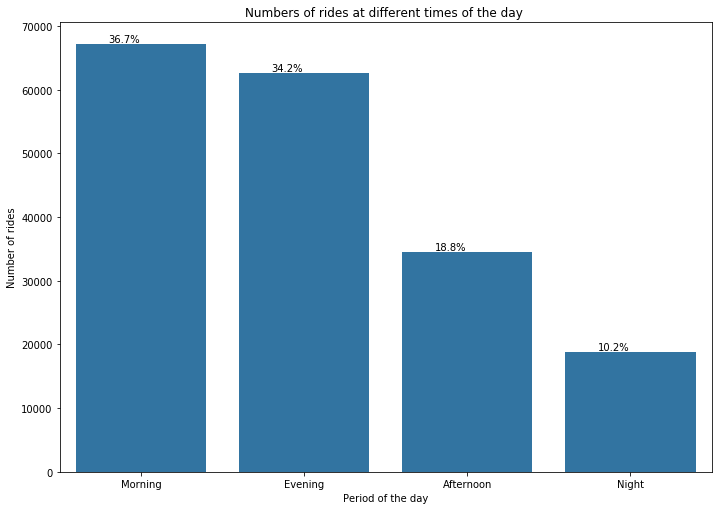

In [44]:
# Putting everything together
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = df, x = 'period', order = period_order, color = base_color)
for i in range(len(pc)):
    count = pc[i]
    pct_string = '{:0.1f}%'.format(100 * count/num_total)
    plt.text( i-0.2, count , pct_string, va= 'bottom')
plt.xlabel('Period of the day')
plt.ylabel("Number of rides")
plt.title('Numbers of rides at different times of the day ')
plt.show()

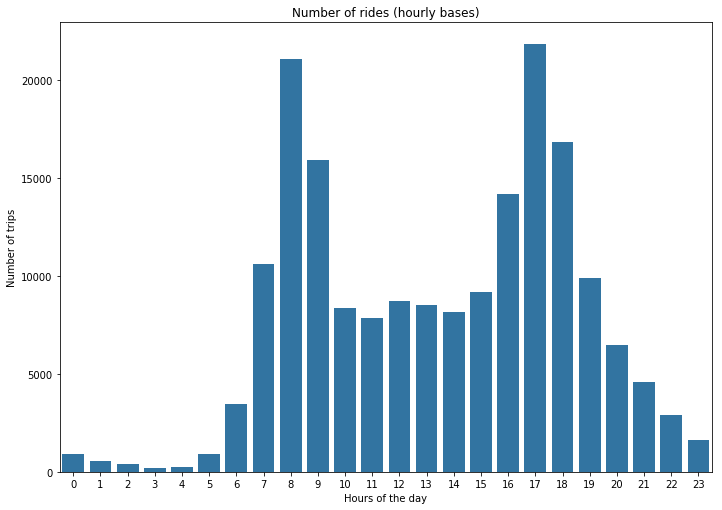

In [45]:
# Seeing the same type of data in an hourly bases
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = df, x = 'start_hour', color = base_color)
plt.xlabel('Hours of the day')
plt.ylabel('Number of trips')
plt.title('Number of rides (hourly bases)');

## Number of rides taken at different days of the week
Bike traffic on weekdays is double compaired to the weekends. I am very much certain that the bike riding service is used by people for going to the offices (9-5). As we saw in the above bimodal plot, the traffic is high in the begining and end of the office hours. But we need more evidence to confirm it.

In [46]:
# Total number of rows in the dataframe
num_total = df.shape[0]
# Number of rides in each day
ride_counts = df.start_day.value_counts()
# Order of days from highest to lowest rides
ride_order = ride_counts.index
rc = ride_counts.values
# maximum no. of ride counts
max_ride_count = ride_counts.max()
# maximum proportion
max_prop = max_ride_count / num_total

# tick proportion
tick_props = np.arange(0, max_prop, 0.02)

#tick_names
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
# base color
base_color = sb.color_palette()[0]

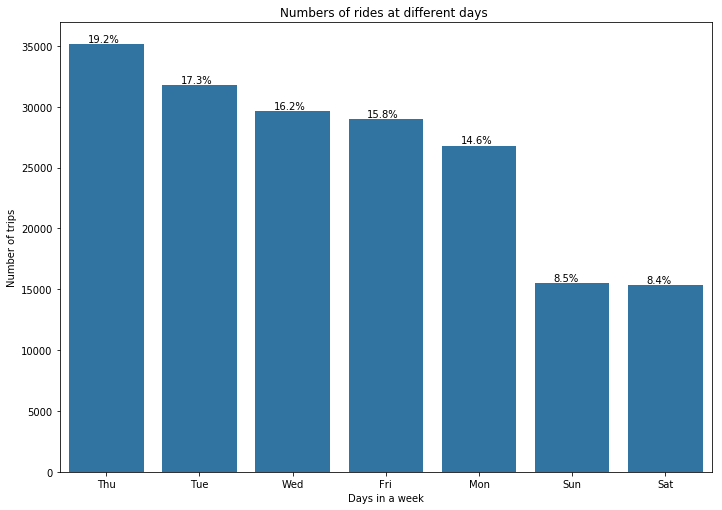

In [47]:
# Putting everything together
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = df, x = 'start_day', order = ride_order, color = base_color)
for i in range(len(rc)):
    count = rc[i]
    pct_string = '{:0.1f}%'.format(100 * count/num_total)
    plt.text( i-0.2, count , pct_string, va= 'bottom');
plt.xlabel('Days in a week')
plt.ylabel('Number of trips')
plt.title('Numbers of rides at different days ')
plt.show()

## Subscribers Vs Non-Subscribers (customers)

The Subscriber average trip duration is less than half of that of the customers. Subscribed riders have shorter variance/range of duration. They seem to have fixed time/path, with less variation. Subscribers travels faster than Customers. Subscribers also have a more consistent speed range.It seems subscribers are more experienced and take the same route everyday (don't have enough data/features to back that).
<br>**The next three slides will show that**.

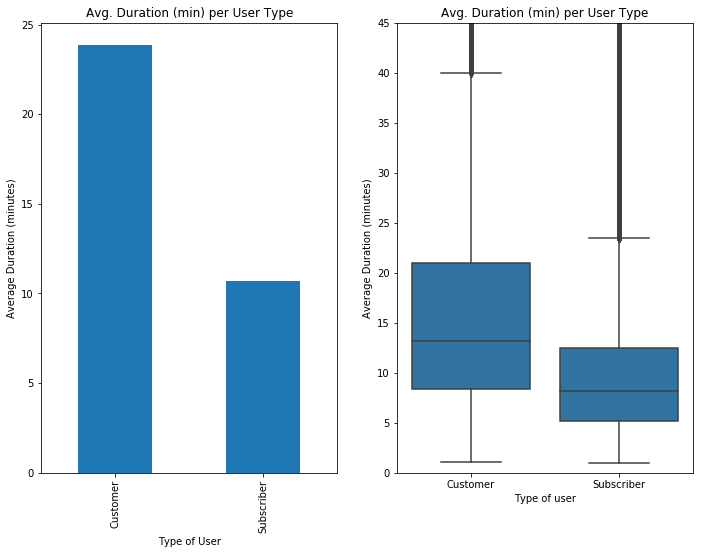

In [48]:
plt.figure(figsize=[ 11.69, 8.27])

# average duration for each user type.
plt.subplot(1,2,1)
df.groupby('user_type').duration_min.mean().plot(kind='bar', color = base_color)
plt.title('Avg. Duration (min) per User Type')
plt.ylabel('Average Duration (minutes)')
plt.xlabel('Type of User');

# distribution of average duration for each user type.
plt.subplot(1,2,2)
sb.boxplot(data = df, y = 'duration_min', x = 'user_type', color = base_color)
plt.title('Avg. Duration (min) per User Type')
plt.ylabel('Average Duration (minutes)')
plt.xlabel('Type of user')
plt.ylim(0,45);


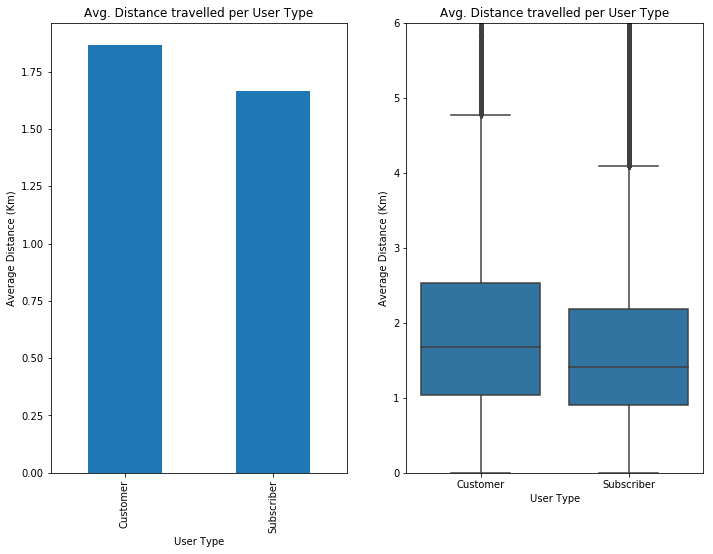

In [49]:
plt.figure(figsize=[ 11.69, 8.27])

# average distance travelled by each user type.
plt.subplot(1,2,1)
df.groupby('user_type').distance_km.mean().plot(kind='bar', color = base_color)
plt.title('Avg. Distance travelled per User Type')
plt.ylabel('Average Distance (Km)')
plt.xlabel('User Type');

# distribution of average distance travelled by user type.
plt.subplot(1,2,2)
sb.boxplot(data = df, y = 'distance_km', x = 'user_type', color = base_color)
plt.title('Avg. Distance travelled per User Type')
plt.ylabel('Average Distance (Km)')
plt.xlabel('User Type');
plt.ylim(0,6);

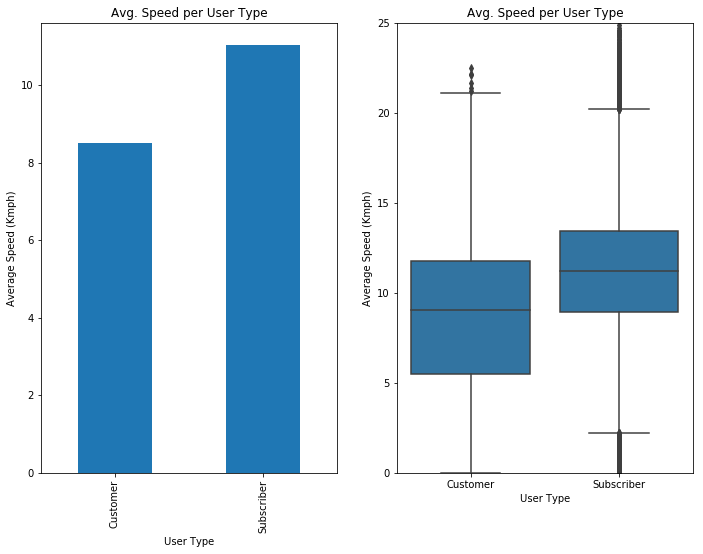

In [50]:
plt.figure(figsize=[ 11.69, 8.27])
# average speed achieved by each user type.
plt.subplot(1,2,1)
df.groupby('user_type').speed_kmph.mean().plot(kind='bar', color = base_color)
plt.title('Avg. Speed per User Type')
plt.ylabel('Average Speed (Kmph)')
plt.xlabel('User Type');

# distribution of average speed achieved by each user type.
plt.subplot(1,2,2)
sb.boxplot(data = df, y = 'speed_kmph', x = 'user_type', color = base_color)
plt.title('Avg. Speed per User Type')
plt.ylabel('Average Speed (Kmph)')
plt.xlabel('User Type')
plt.ylim(0,25);

In [51]:
#Since it take a lot of time to memory to render multivariate plots, we are making a sample dataframe with 5k rows.
# dfs is short for dataframe sample.
np.random.seed(2019)
sample = np.random.choice(df.shape[0], 5000, replace = False)
dfs = df.loc[sample]

## User type (Subscribers / Customers) Vs Speed
Subscribers are faster than Customers. 
- (Average Customer speed) : 8.5 Kmph
- (Average Subscriber Speed) : 11.05 Kmph.

<Figure size 841.68x595.44 with 0 Axes>

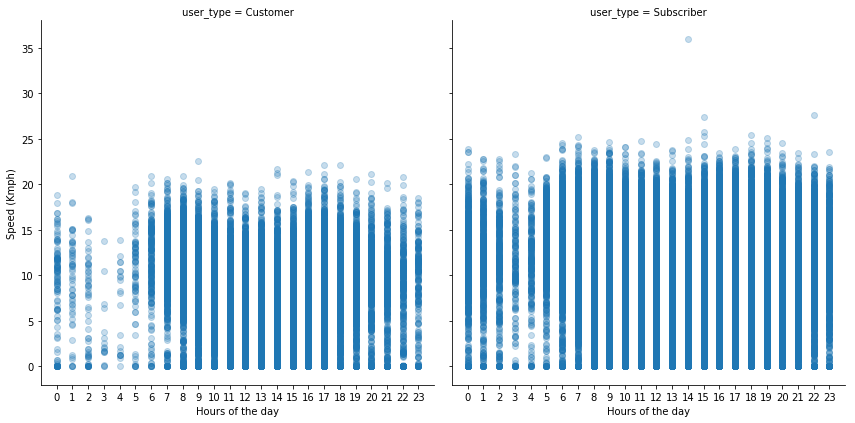

In [52]:
# Plotting three graph with Age (x axis), Duration_sec (y-axis) and the make three depending on the gender type.
#plt.figure(figsize=(14,6))
plt.figure(figsize=[ 11.69, 8.27])
genders = sb.FacetGrid(data = df, col = 'user_type', size = 6, xlim = [-1,24])
genders.map(plt.scatter, 'start_hour', 'speed_kmph', alpha=0.25, color = sb.color_palette()[0])
genders.set_xlabels('Hours of the day')
genders.set_ylabels('Speed (Kmph)')
plt.xticks(np.arange(0,24,1))
plt.show();

## User Type on different days of the week

The number of trips by subscribers decreased by approximately a factor of half in weekends compared to weekdays, but for customers there is almost no difference. Thursday is the most popular day for both subscribers and customers to head out for a trip.

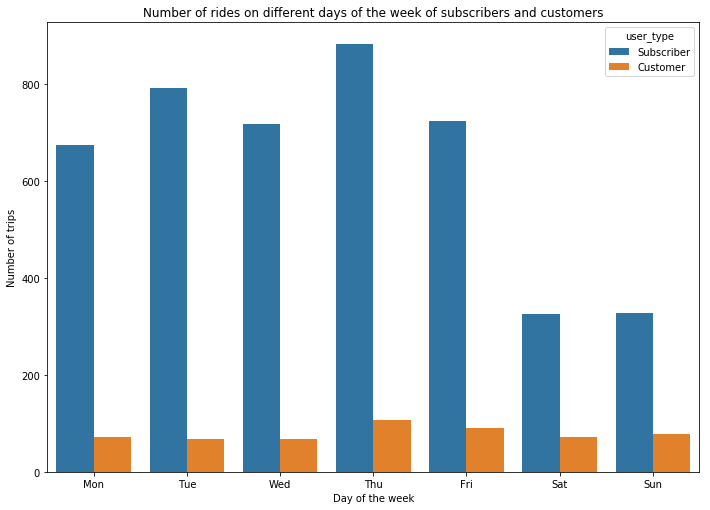

In [53]:
plt.figure(figsize=[ 11.69, 8.27])

day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = dfs, x = 'start_day', hue = 'user_type', order = day_order)
plt.xlabel('Day of the week')
plt.ylabel('Number of trips')
plt.title('Number of rides on different days of the week of subscribers and customers');

## Number of rides on different days of the week, at different time period.
>>
**Morning**     - (6 am to 12pm) <br>
**Afternoon**   - (12 pm to 4pm) <br>
**Evening**     - (4 pm to 8 pm) <br>
**Night**       - Rest of the time

- During the weekdays, most number of trips are during Morning and Evening.
- During the weekends, most number of trips happen during the afternoon and evening. 
- The number of trips in the afternoon were not affected by weekdays or weekends.
- Number of trips during night (8pm to 6am) remain least popular, through the entire week.

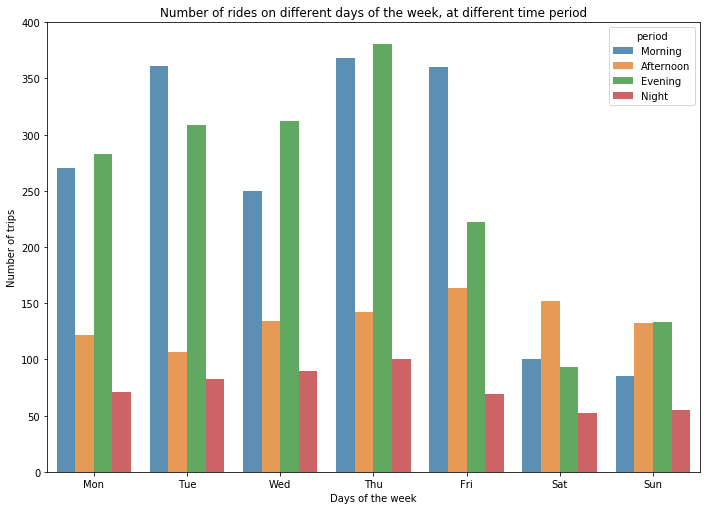

In [54]:
# Plotting a graph with number of trips on y axis, day of the week on the x axis and on each day 
plt.figure(figsize=[ 11.69, 8.27])
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = dfs, x = 'start_day', hue = 'period', alpha = 0.8, order = day_order);
plt.xlabel('Days of the week')
plt.ylabel('Number of trips')
plt.title('Number of rides on different days of the week, at different time period');